<a href="https://colab.research.google.com/github/WhitworthPhysics/shot-noise-carlapcalderon/blob/main/Shot_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and import libraries

In [ ]:
!pip install whit-phys-util

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc

#Connect to Github

In [ ]:
repo = buc.local_repository("https://github.com/WhitworthPhysics/shot-noise-carlapcalderon")

Repository exists at this location. Pulling changes from GitHub.


# 1. Experimental Procedure

# Equipment and materials

| Description | Manufacturer | Model | ID or SN |
| ----------- | ------------ | ----- | -------- |
| Graphical Multimeter | FLUKE | 867B | 002148 |
| Oscilloscope | SIGLENT | SDS 1052DL | SDS100P1151565 |
| Noise Fundamentals High and Low Levels | Teach Spin | NF1-A | NF162 | 
| Coaxial cables with BNC connectors | N/A | N/A | N/A|
| Universal Power Supply | Astrodyne | SPU45-210 | 08751776 1351 |


# 2. Data Analysis

## Brightness Analysis

In [ ]:
df_bright= pd.read_csv("Shot_Noise_Brightness_Dependence.csv")

In [ ]:
Rf = 10000 #ohms
G1 = 100
G2 = 1008

df_bright["Average Flow Rate (A)"] = -df_bright["V Monitor (V)"]/Rf
df_bright["Mean Square Dev. (A/s)"] = df_bright["V Meter (V)"]*10/((G1*G2*Rf)**2)
df_bright

,V Monitor (V),V Meter (V),Average Flow Rate (A),Mean Square Dev. (A/s)
0,-0.102,0.068,0.00001,6.692492e-19
1,-0.201,0.105,0.00002,1.033399e-18
2,-0.300,0.142,0.00003,1.397550e-18
3,-0.399,0.180,0.00004,1.771542e-18
4,-0.500,0.218,0.00005,2.145534e-18
5,-0.600,0.257,0.00006,2.529368e-18
6,-0.700,0.295,0.00007,2.903360e-18
7,-0.801,0.335,0.00008,3.297036e-18
8,-0.900,0.373,0.00009,3.671029e-18
9,-1.000,0.412,0.00010,4.054863e-18


In [ ]:
fitTable, fitFunc = buc.prettyPolyFit( df_bright['Average Flow Rate (A)'], df_bright['Mean Square Dev. (A/s)'])#Find best fit curve and parameters

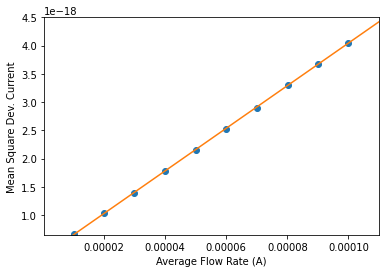

In [ ]:
fig1, ax = plt.subplots() 
ax.plot(df_bright['Average Flow Rate (A)'], df_bright['Mean Square Dev. (A/s)'], 'o')
t_fit = np.linspace(0,10,2)
ax.plot(t_fit, fitFunc(t_fit))
ax.set_xlabel("Average Flow Rate (A)");
ax.set_ylabel("Mean Square Dev. Current");
ax.set_xlim(0.0000005, 0.00011)
ax.set_ylim(6.5e-19, 4.5e-18);

In [ ]:
fitTable

,slope,intercept
value,3.774280e-14,2.703067e-19
uncertainty,1.983348e-16,1.230892e-20


In [ ]:
deltaf = 110961
e = fitTable.loc['value','slope']/(2*deltaf)
e

1.7007237725592301e-19

In [ ]:
de = fitTable.loc['uncertainty','slope']/(2*deltaf)
de

8.93713989143855e-22

In [ ]:
etrue = 1.6021766*10**-19 #C
err = (etrue-e)*100/etrue
err

-6.150830848436439

## Bandwidth Analysis

In [ ]:
df_band= pd.read_csv("Shot_Noise_Bandwidth_Dependence.csv")

In [ ]:
df_band["Mean Square Dev. (A/s)"] = df_band["V Meter (V)"]*10/((G1*G2*Rf)**2)
df_band

In [ ]:
fitTable, fitFunc = buc.prettyPolyFit( df_band['BandWitdth (Hz)'], df_band["Mean Square Dev. (A/s)"])#Find best fit curve and parameters

In [ ]:
fig1, ax = plt.subplots() 
ax.plot(df_band['BandWitdth (Hz)'], df_band["Mean Square Dev. (A/s)"], 'o')
t_fit = np.linspace(0,120000,2)
ax.plot(t_fit, fitFunc(t_fit))
ax.set_xlabel("BandWidth (Hz)");
ax.set_ylabel("Mean Square Dev. (A/s)");

In [ ]:
fitTable

In [ ]:
Idc = 100/Rf 
e = fitTable.loc['value','slope']/(2*Idc)
de = fitTable.loc['uncertainty','slope']/(2*Idc)
e

In [ ]:
de

In [ ]:
err = (etrue-e)*100/etrue
err

# Reflection

1. Intercept term in the best fit line of brightness dependent data describes the offset of the mean square deviation current within the apparatus. 
2. The brightness dependence data gave the best result of for e. This approach gave a percent error of 6.2% with a uncertainty of 8.9e-22 for the value of the fundamental charge. Compare to the 15% error of the bandwidth approach with and uncertainty of 1.6e-19. Since the percent error and uncertainty value of the brightness approach are smaller we can conclude that is a better approach. 
3. The brightness method was the better approach not only because we used actual measured data for the majority of the analysis (rather than the given table used in the bandwidth approach) but also because physics would suggest the same. 
4. Yes, these results support Eq. 8 since we were able to calculate for the value of fundamental charge using the equation and found a percent error of only 15%.  

